In [20]:
import gmsh
import numpy as np
from finiteelementanalysis import pre_process as pre 
from finiteelementanalysis import pre_process_demo_helper_fcns as pre_demo

def fcn_interp_1(x, y):
    return np.sin(x / 10.0) * np.cos(y / 10.0)

def fcn_interp_deriv_1(x, y):
    df_dx = np.cos(x / 10.0) * np.cos(y / 10.0) * 1.0 / 10.0
    df_dy = -np.sin(x / 10.0) * np.sin(y / 10.0) * 1.0 / 10.0
    return np.array([df_dx, df_dy])

Info    : Meshing order 2 (curvilinear on)...
Info    : Done meshing order 2 (Wall 1.97212e-05s, CPU 2e-05s)
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 40%] Meshing curve 3 (Line)
Info    : [ 60%] Meshing curve 4 (Line)
Info    : [ 70%] Meshing curve 5 (Line)
Info    : [ 90%] Meshing curve 6 (Line)
Info    : Done meshing 1D (Wall 0.00039596s, CPU 0.000761s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.000827498s, CPU 0.000897s)
Info    : 37 nodes 78 elements
Info    : Meshing order 2 (curvilinear on)...
Info    : [  0%] Meshing curve 1 order 2
Info    : [ 20%] Meshing curve 2 order 2
Info    : [ 30%] Meshing curve 3 order 2
Info    : [ 50%] Meshing curve 4 order 2
Info    : [ 60%] Meshing curve 5 order 2
Info    : [ 80%] Meshing curve 6 order 2
Info    : [ 90%] Meshing surface 1 order 2
Info    : Surface mesh: worst distortion = 1 (0 elements in ]0

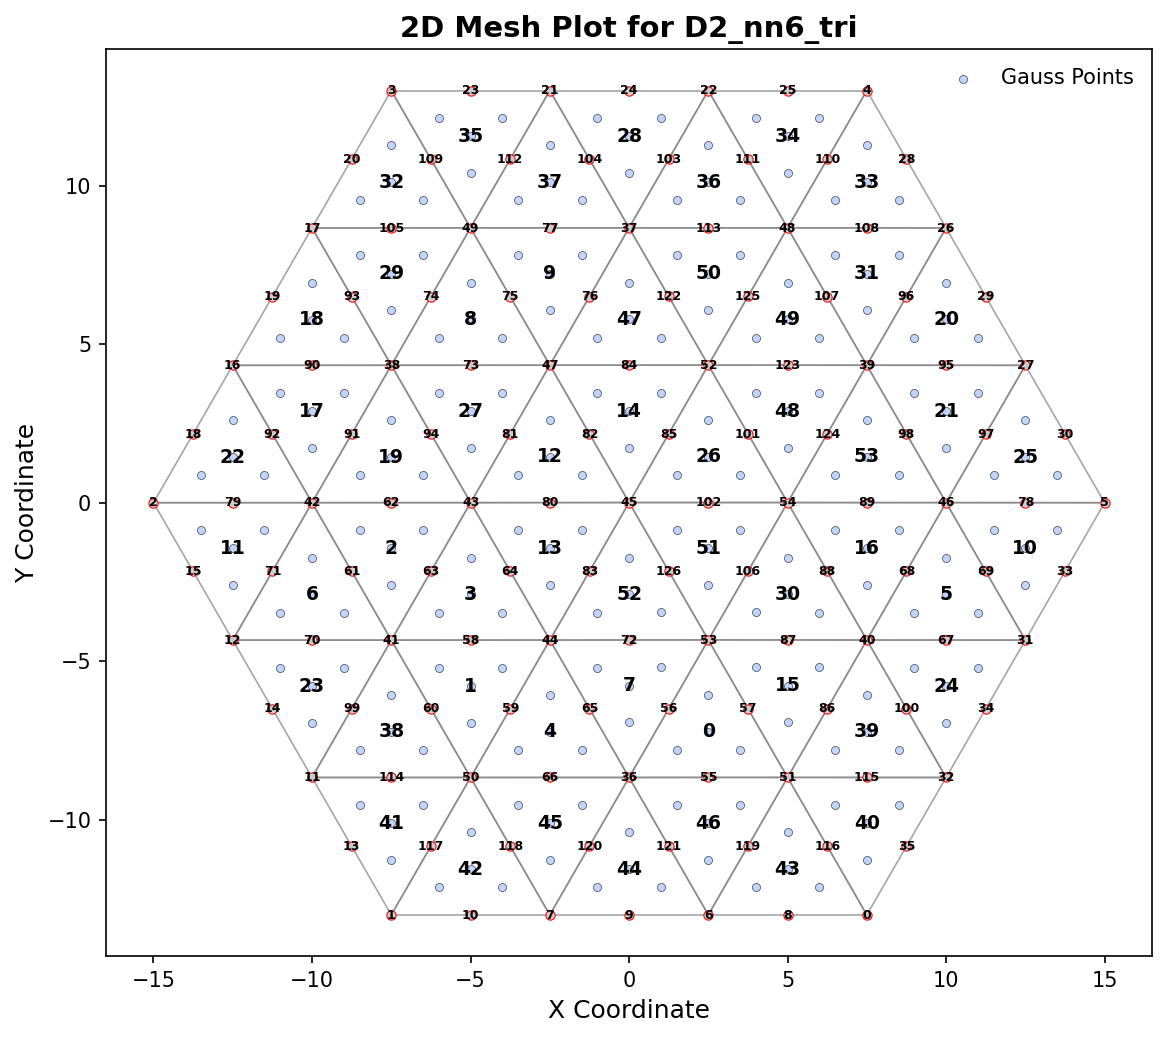

In [28]:
outline_coords = [ [7.5, -13.0], [-7.5, -13.0], [-15, 0], [-7.5, 13.0], [7.5, 13.0], [15, 0] ]
ele_type = "D2_nn6_tri"
num_gauss = 4
mesh_name = f"hexagon_mesh_{ele_type}_gp{num_gauss}"
mesh_size = 5
coords, connect = pre.mesh_outline(outline_coords, ele_type, mesh_name, mesh_size)
mesh_gauss_pts = pre_demo.get_all_mesh_gauss_pts(ele_type, num_gauss, coords, connect)
pre_demo.plot_mesh_2D(mesh_name, ele_type, coords, connect, mesh_gauss_pts)


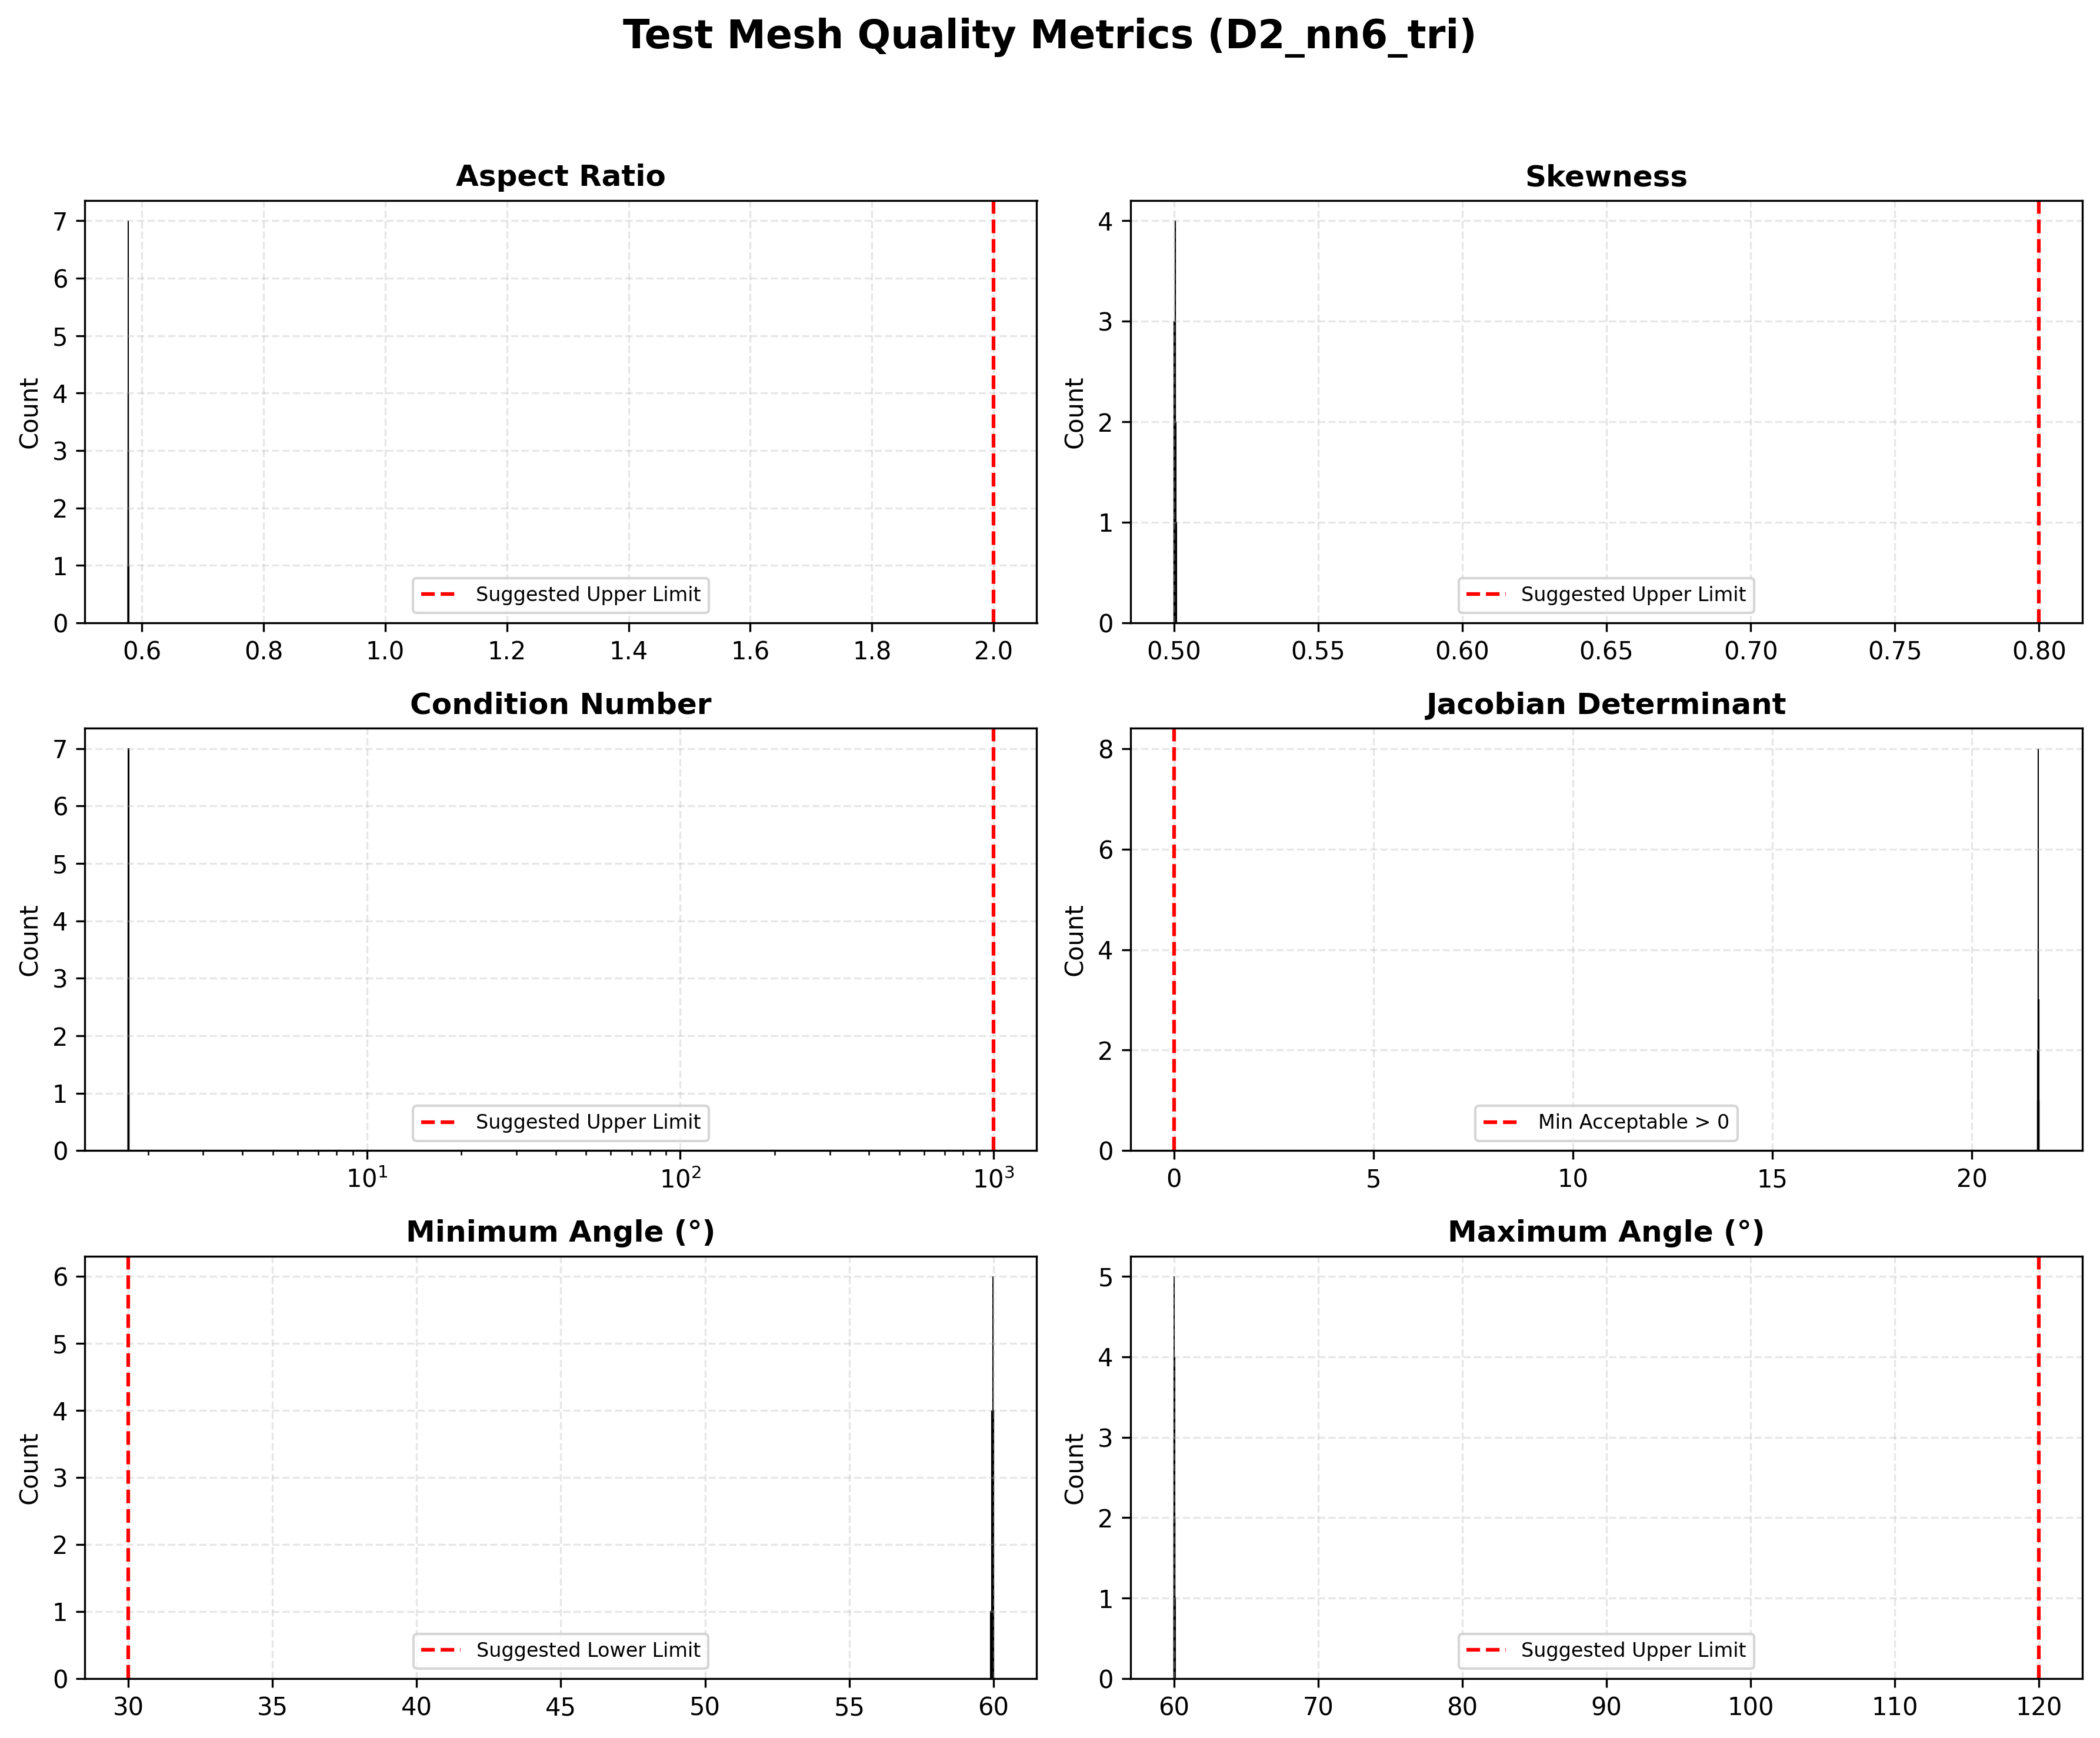

In [29]:
aspect_ratios, skewness, min_angles, max_angles = pre_demo.compute_element_quality_metrics(ele_type, coords, connect)
cond_nums, jac_dets = pre_demo.compute_condition_and_jacobian(ele_type, coords, connect)
plot_file = mesh_name + "_histograms"
pre_demo.plot_element_quality_histograms(
fname=str(plot_file),
super_title="Test Mesh Quality Metrics (%s)" % (ele_type),
ele_type=ele_type,
cond_nums=cond_nums,
jac_dets=jac_dets,
aspect_ratios=aspect_ratios,
skewness=skewness,
min_angles=min_angles,
max_angles=max_angles
)


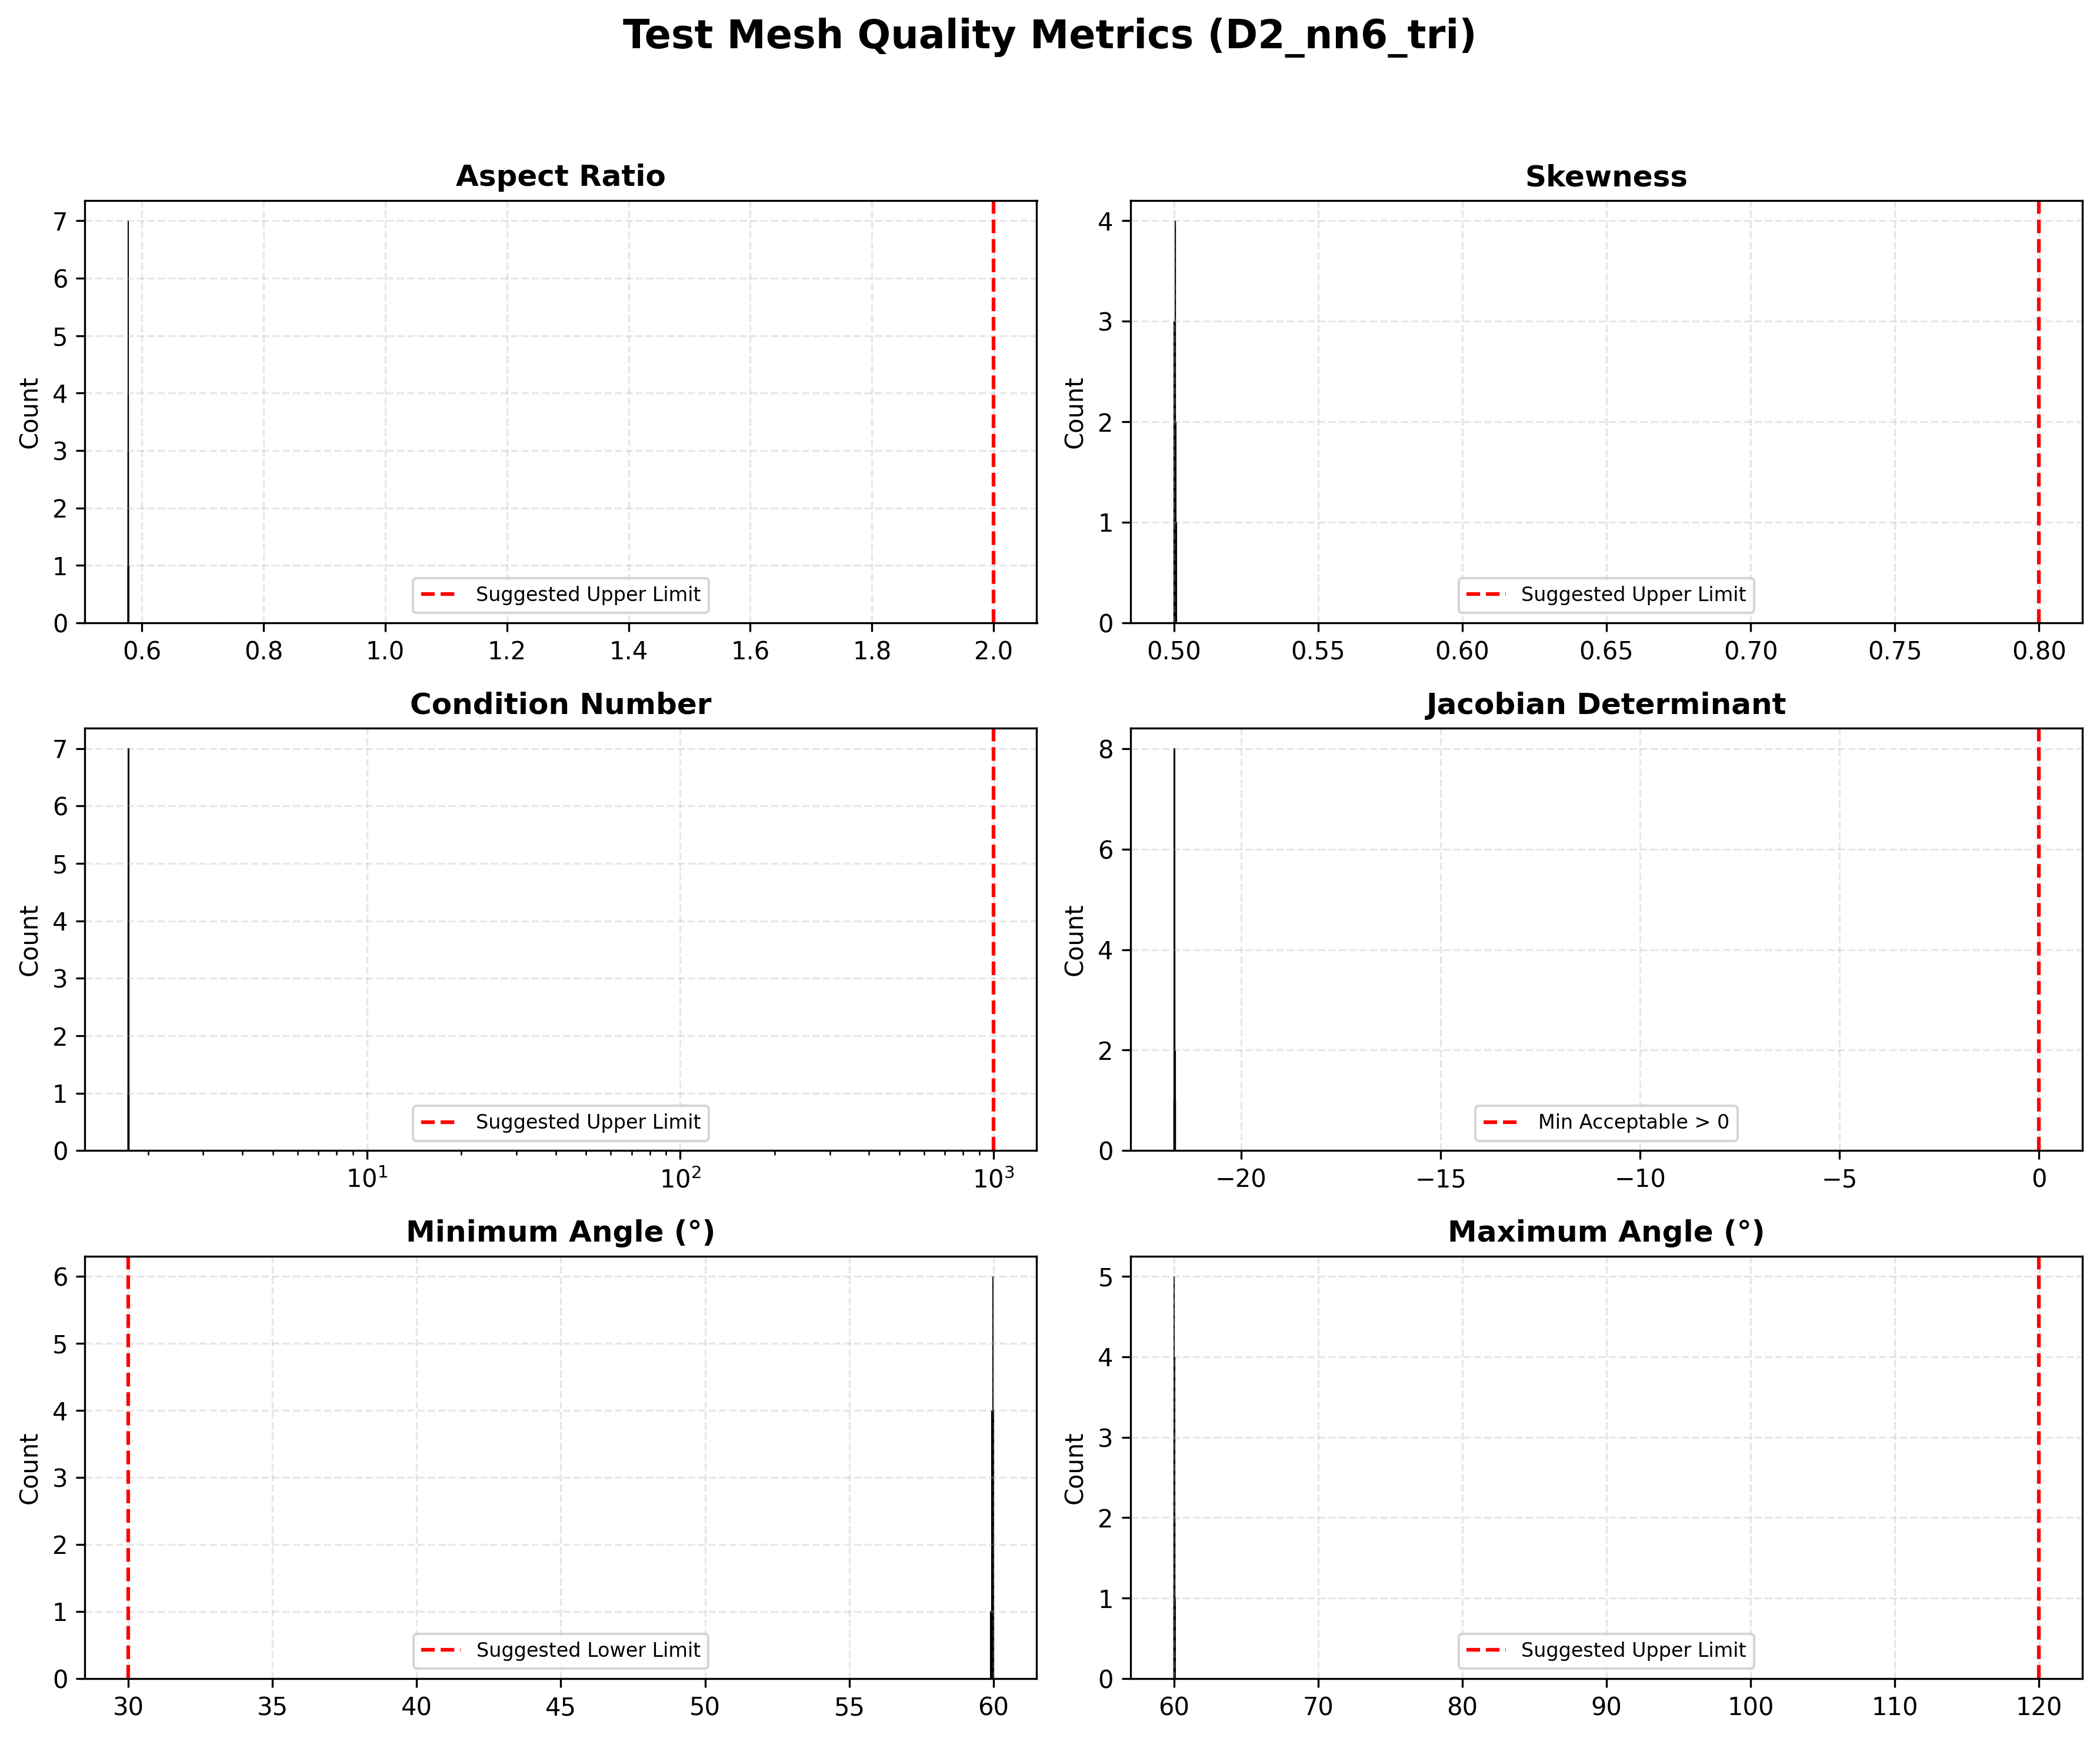

In [26]:
aspect_ratios, skewness, min_angles, max_angles = pre_demo.compute_element_quality_metrics(elem, coords, connect)
cond_nums, jac_dets = pre_demo.compute_condition_and_jacobian(ele_type, coords, connect)
plot_file = mesh_name + "_histograms"
pre_demo.plot_element_quality_histograms(
    fname=str(plot_file),
    super_title="Test Mesh Quality Metrics (%s)" % (ele_type),
    ele_type=ele_type,
    cond_nums=cond_nums,
    jac_dets=jac_dets,
    aspect_ratios=aspect_ratios,
    skewness=skewness,
    min_angles=min_angles,
    max_angles=max_angles
    )   


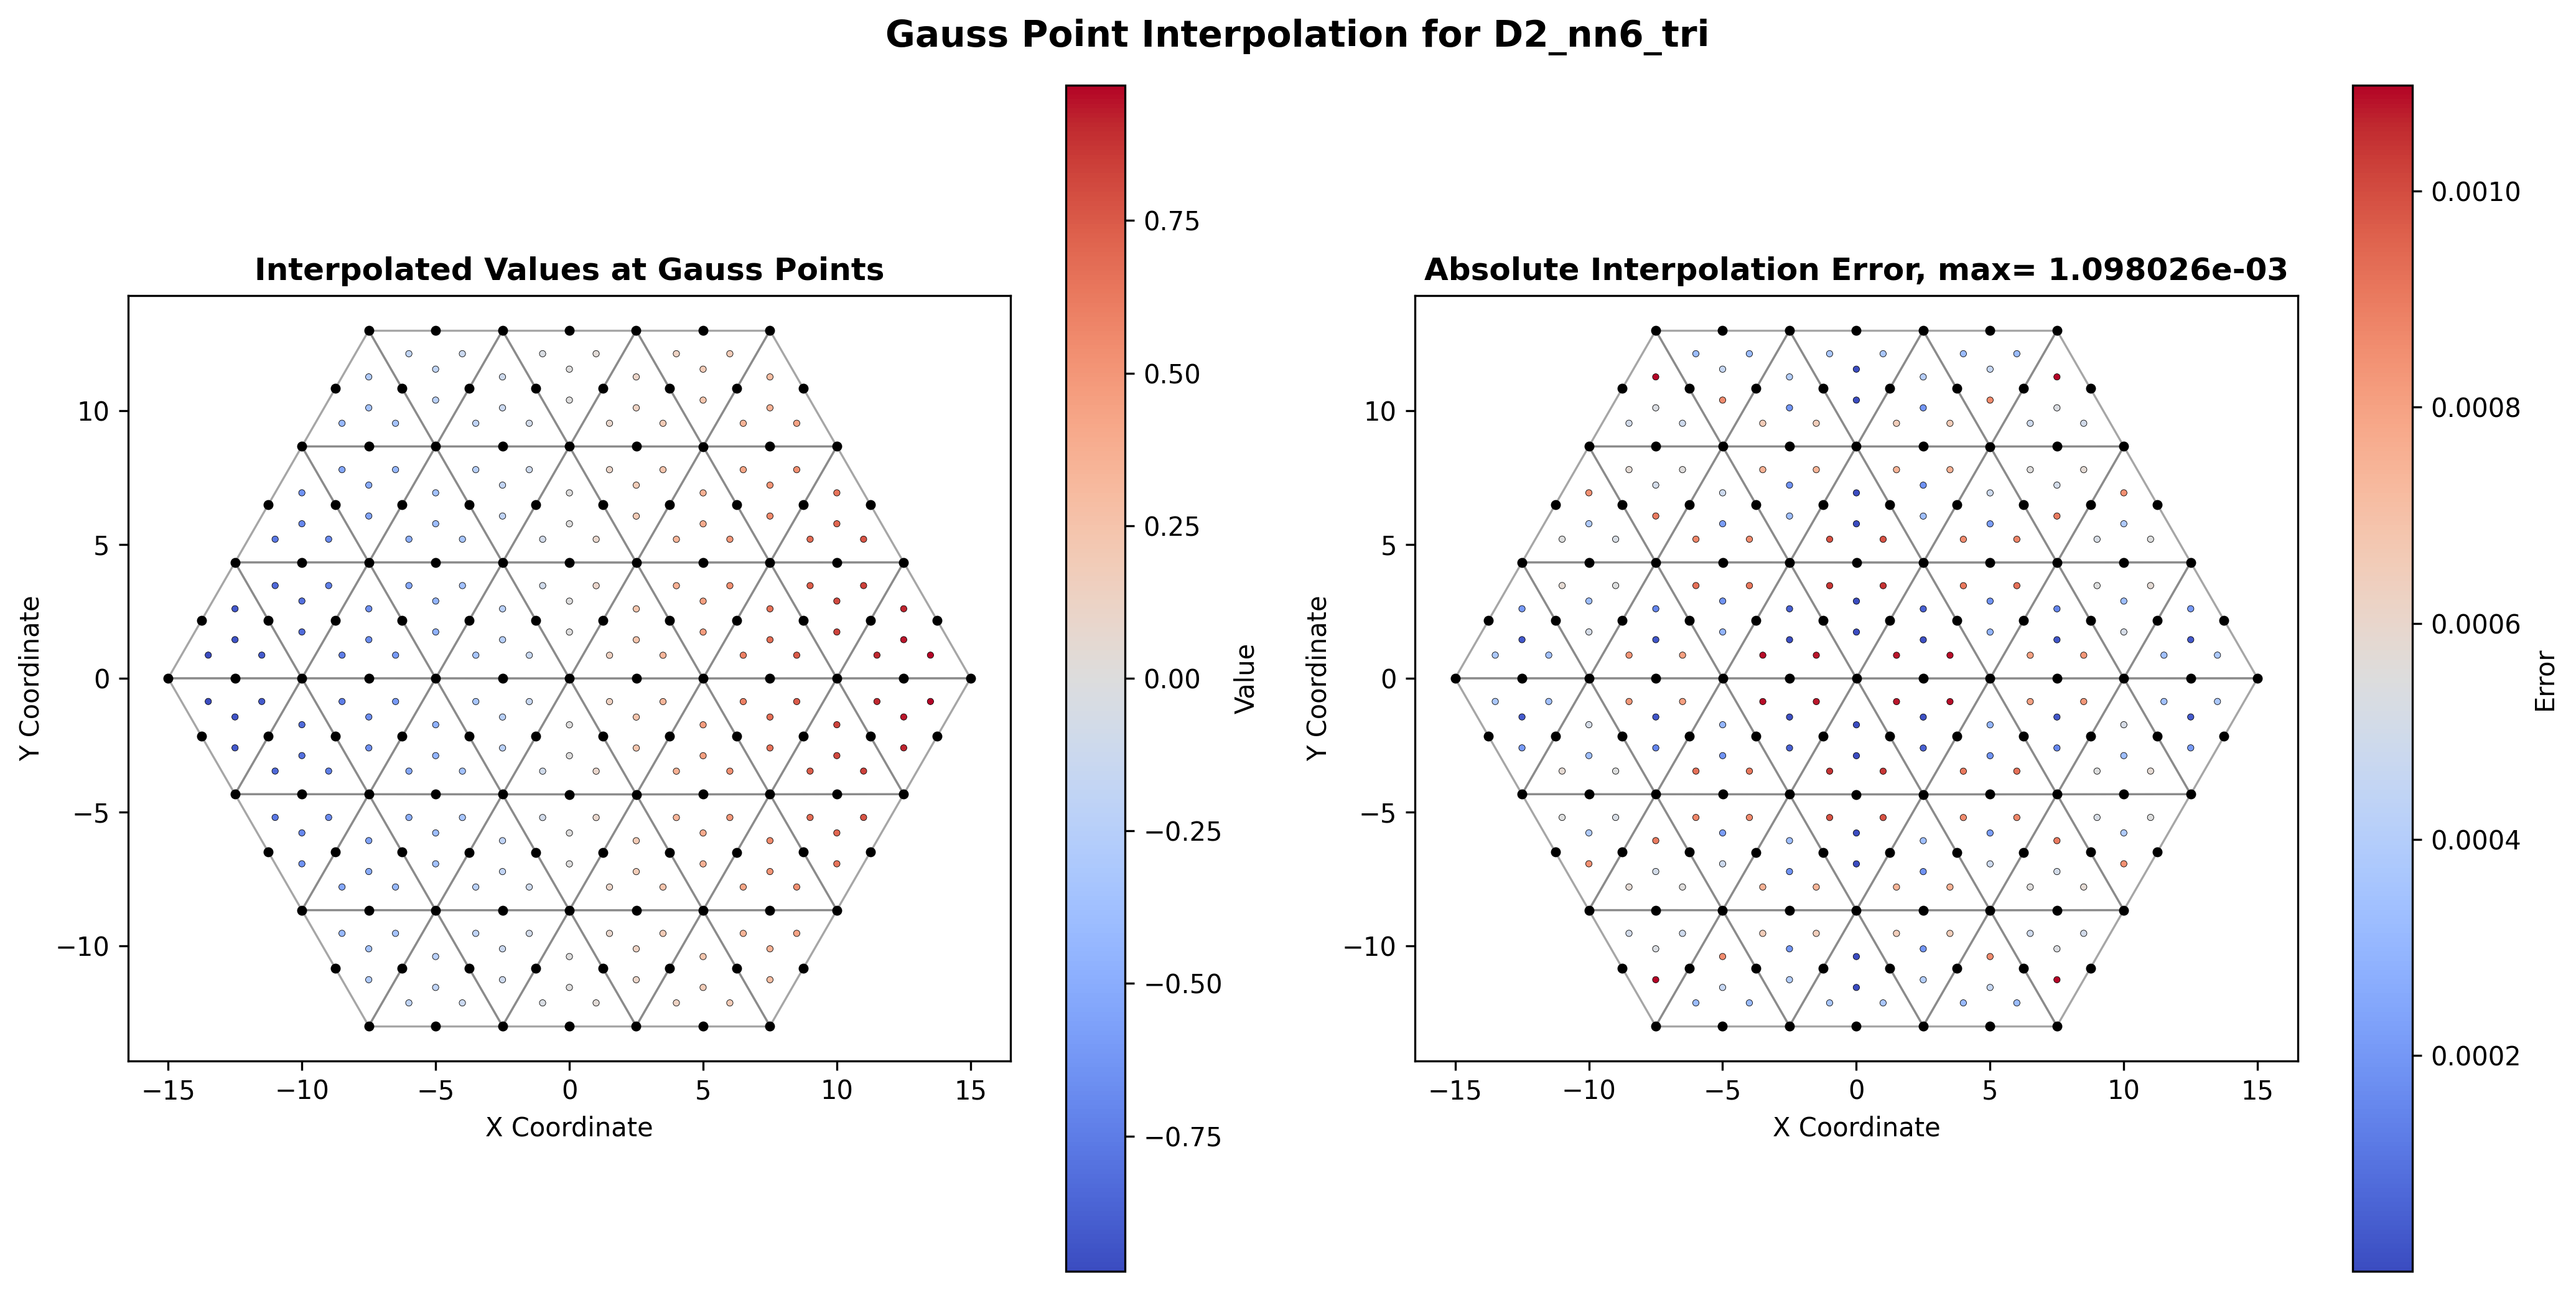

In [27]:
ground_truth_fcn = fcn_interp_1(mesh_gauss_pts[..., 0], mesh_gauss_pts[..., 1])
# Vectorized evaluation
interpolated = pre_demo.interpolate_scalar_to_gauss_pts(ele_type, num_gauss, fcn_interp_1, coords, connect)
error_plot = mesh_name + "_fcn_errors"
pre_demo.plot_interpolation_with_error(
    str(error_plot),
    ele_type,
    coords,
    connect,
    mesh_gauss_pts,
    interpolated,
    ground_truth_fcn)




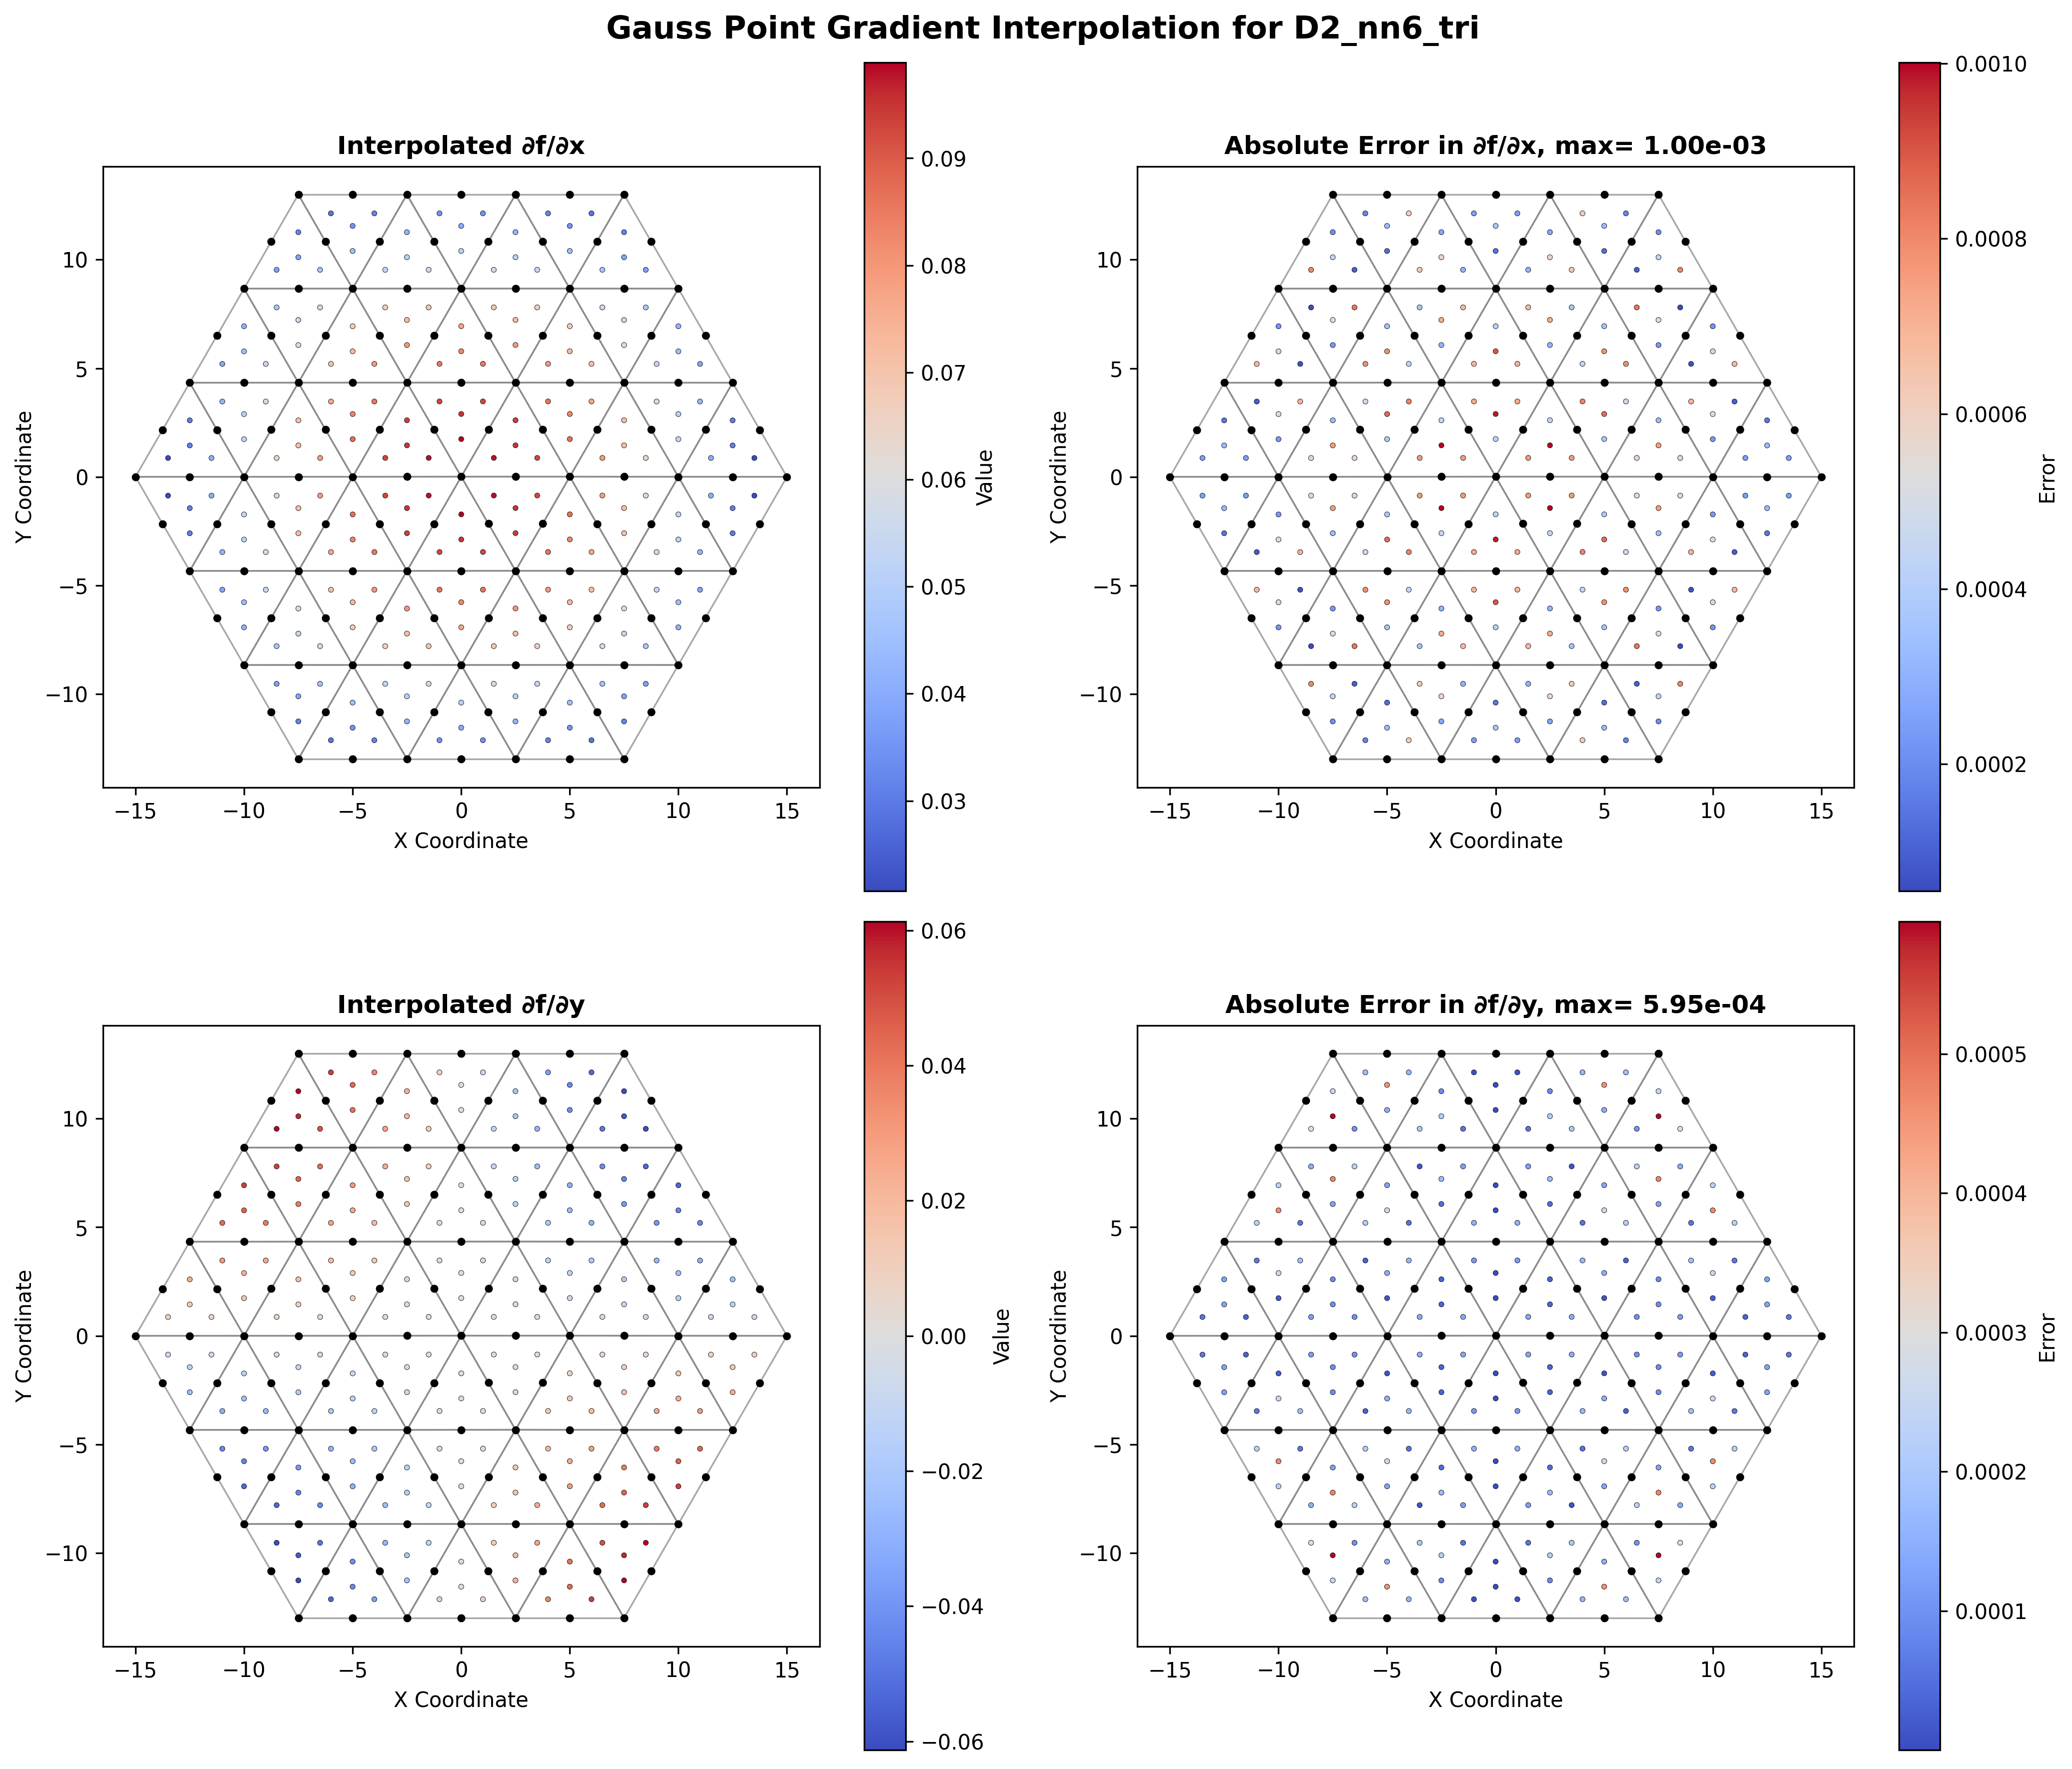

In [30]:
ground_truth_grad = np.zeros_like(mesh_gauss_pts)
for kk in range(mesh_gauss_pts.shape[0]):
    for jj in range(mesh_gauss_pts.shape[1]):
        x = mesh_gauss_pts[kk, jj, 0]
        y = mesh_gauss_pts[kk, jj, 1]
        ground_truth_grad[kk, jj] = fcn_interp_deriv_1(x, y)

interpolated_grad = pre_demo.interpolate_scalar_deriv_to_gauss_pts(
    ele_type,
    num_gauss,
    fcn_interp_1,
    coords,
    connect)

grad_error_plot = mesh_name + "_fcn_grad_errors"
pre_demo.plot_interpolation_gradient_with_error(
    str(grad_error_plot),
    ele_type,
    coords,
    connect,
    mesh_gauss_pts,
    interpolated_grad,
    ground_truth_grad)
